<a href="https://colab.research.google.com/github/Coolershock/TPBuscaYerba/blob/main/BuscaYerba8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


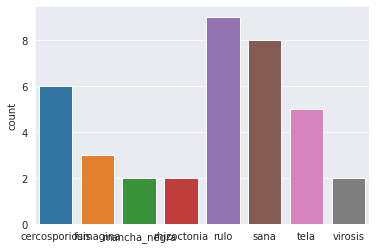

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

labels = ['cercosporiosis', 'fumagina', 'mancha_negra', 'rhizoctonia', 'rulo', 'sana', 'tela', 'virosis']
img_size = 224
data_dir = '/content/drive/MyDrive/Trabajo ML 2021/Dataset/Dataset Imagenes/train'
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
	
train = get_data('/content/drive/MyDrive/Trabajo ML 2021/Dataset/Dataset Imagenes/train')
val = get_data('/content/drive/MyDrive/Trabajo ML 2021/Dataset/Dataset Imagenes/train')

l = []
for i in train:
    if(i[1] == 0):
        l.append("cercosporiosis")
    else:
      if(i[1] == 1):
        l.append("fumagina")
      if(i[1] == 2):
        l.append("mancha_negra")
      if(i[1] == 3):
        l.append("rhizoctonia")
      if(i[1] == 4):
        l.append("rulo")
      if(i[1] == 5):
        l.append("sana")
      if(i[1] == 6):
        l.append("tela")
      if(i[1] == 7):
        l.append("virosis")
      
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'cercosporiosis')

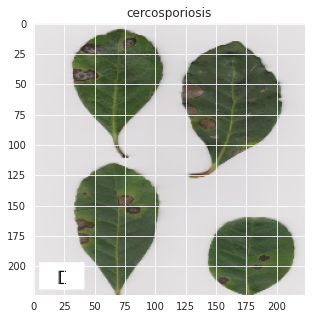

In [15]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'virosis')

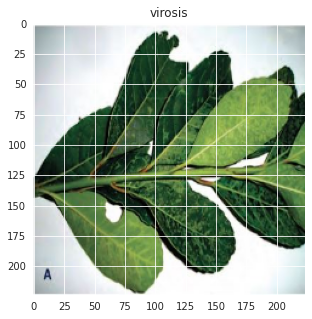

In [16]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [17]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(8, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)       

In [18]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


2/2 [==============================] - 5s 2s/step - loss: 2.0927 - accuracy: 0.1137 - val_loss: 2.0918 - val_accuracy: 0.1351
Epoch 2/100
2/2 [==============================] - 3s 1s/step - loss: 2.0996 - accuracy: 0.0645 - val_loss: 2.0901 - val_accuracy: 0.1351
Epoch 3/100
2/2 [==============================] - 3s 1s/step - loss: 2.0835 - accuracy: 0.1706 - val_loss: 2.0884 - val_accuracy: 0.1351
Epoch 4/100
2/2 [==============================] - 3s 1s/step - loss: 2.1016 - accuracy: 0.1033 - val_loss: 2.0865 - val_accuracy: 0.1351
Epoch 5/100
2/2 [==============================] - 3s 1s/step - loss: 2.0948 - accuracy: 0.1137 - val_loss: 2.0847 - val_accuracy: 0.1351
Epoch 6/100
2/2 [==============================] - 3s 1s/step - loss: 2.0905 - accuracy: 0.1318 - val_loss: 2.0828 - val_accuracy: 0.1351
Epoch 7/100
2/2 [==============================] - 3s 1s/step - loss: 2.0915 - accuracy: 0.1602 - val_loss: 2.0810 - val_accuracy: 0.1351
Epoch 8/100
2/2 [=============================

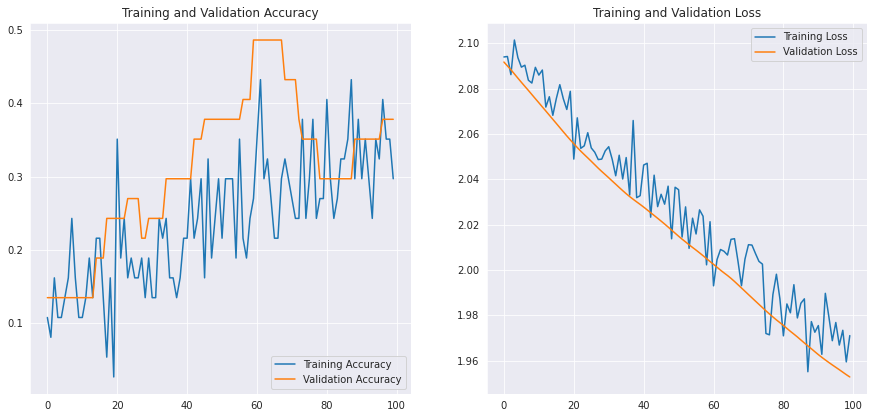

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
predictions = np.argmax(model.predict(x_val), axis=-1)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['cercosporiosis (Class 0)','fumagina (Class 1)','mancha_negra (Class 2)','rhizoctonia (Class 3)','rulo (Class 4)','sana (Class 5)','tela (Class 6)','virosis (Class 7)']))

                          precision    recall  f1-score   support

cercosporiosis (Class 0)       0.80      0.67      0.73         6
      fumagina (Class 1)       0.00      0.00      0.00         3
  mancha_negra (Class 2)       0.00      0.00      0.00         2
   rhizoctonia (Class 3)       0.00      0.00      0.00         2
          rulo (Class 4)       0.29      1.00      0.45         9
          sana (Class 5)       1.00      0.12      0.22         8
          tela (Class 6)       0.00      0.00      0.00         5
       virosis (Class 7)       0.00      0.00      0.00         2

                accuracy                           0.38        37
               macro avg       0.26      0.22      0.17        37
            weighted avg       0.42      0.38      0.28        37



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
